In [488]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import display
from dtreeviz.trees import dtreeviz

In [466]:
df = pd.read_csv('data/dataframe_for_model.csv')
df.shape

(12491, 11)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   12491 non-null  int64  
 1   Bedrooms                     12491 non-null  int64  
 2   Bathrooms                    12491 non-null  float64
 3   Total interior livable area  12491 non-null  float64
 4   Elementary School Score      12491 non-null  float64
 5   Middle School Score          12491 non-null  float64
 6   High School Score            12491 non-null  float64
 7   Tax assessed value           12491 non-null  float64
 8   Annual tax amount            12491 non-null  float64
 9   Listed Price                 12491 non-null  float64
 10  City                         12491 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 1.0+ MB


In [331]:
Cities = pd.get_dummies(df["City"], drop_first=True)
Cities


,Aguanga,Alameda,Alamo,Albany,Alpine,Alturas,American Canyon,Anaheim,Angels Camp,Angelus Oaks,...,Wofford Heights,Woodbridge,Woodlake,Woodland,Wrightwood,Yolo,Yorba Linda,Yountville,Yuba City,Zamora
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
house_data = df.drop(columns=["Unnamed: 0", "City"])
house_data

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0
...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0


In [333]:
Cities

,Aguanga,Alameda,Alamo,Albany,Alpine,Alturas,American Canyon,Anaheim,Angels Camp,Angelus Oaks,...,Wofford Heights,Woodbridge,Woodlake,Woodland,Wrightwood,Yolo,Yorba Linda,Yountville,Yuba City,Zamora
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [334]:
# Merge One-Code DataFrame to X
house_data = house_data.join(Cities)
house_data

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,Aguanga,...,Wofford Heights,Woodbridge,Woodlake,Woodland,Wrightwood,Yolo,Yorba Linda,Yountville,Yuba City,Zamora
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,0,...,0,0,0,0,0,0,0,0,0,0
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,0,...,0,0,0,0,0,0,0,0,0,0
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,0,...,0,0,0,0,0,0,0,0,0,0
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,0,...,0,0,0,0,0,0,0,0,0,0


## # Visualize Data

<Figure size 720x432 with 0 Axes>

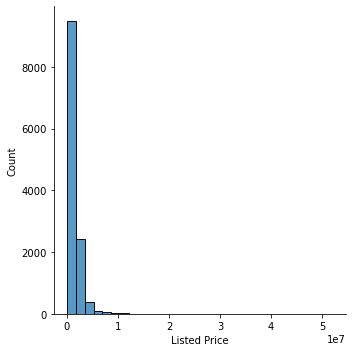

In [335]:
# Displot: to see where listed price are.
plt.figure(figsize=(10,6))
sns.displot(house_data['Listed Price'], bins=30)

In [336]:
house_data.iloc[:100, 0:9]  

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0
...,...,...,...,...,...,...,...,...,...
95,4,3.0,1952.0,5.0,2.0,6.0,166984.0,2322.0,1549000.0
96,4,2.0,1399.0,7.0,6.0,8.0,1243907.0,15116.0,2199000.0
97,5,4.0,2253.0,3.0,4.0,2.0,339181.0,4395.0,796000.0
98,3,1.0,1430.0,6.0,4.0,5.0,944227.0,11972.0,1198000.0


<AxesSubplot:>

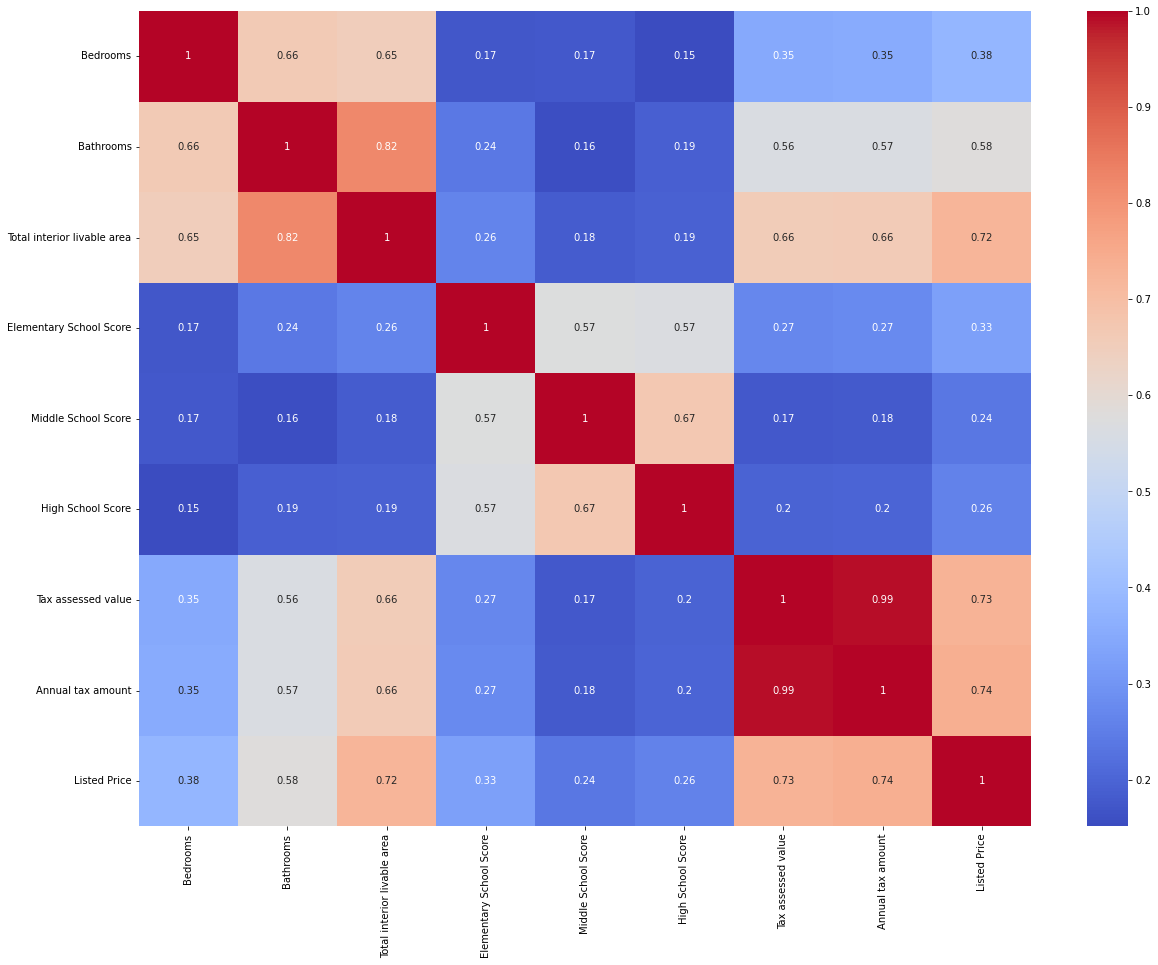

In [337]:
# Get Correlation
plt.figure(figsize=(20,15))
corr_df = house_data.iloc[:, 0:9]
corr_matrix = corr_df.corr()
sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True)

Text(0, 0.5, 'Price')

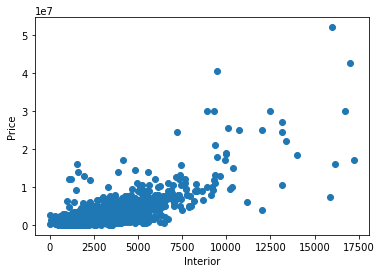

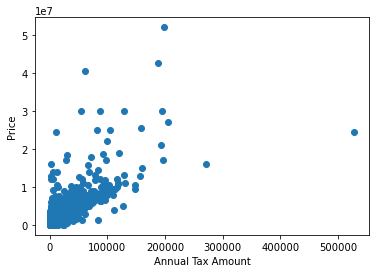

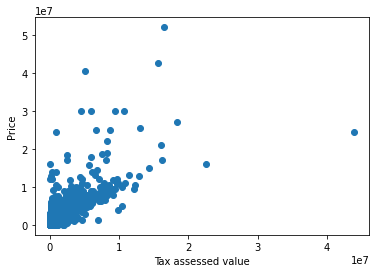

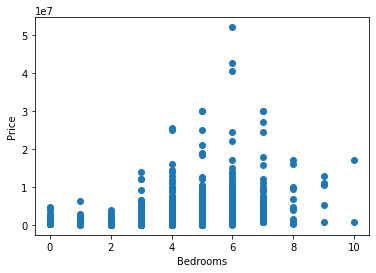

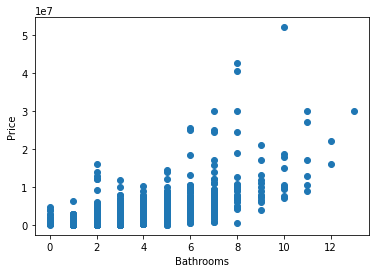

In [338]:
# Scatter plots to observe the correlations between the features that are
# highly correlated with Listed Price
target_var = corr_df['Listed Price']
plot1 = plt.figure(1)
plt.scatter(corr_df["Total interior livable area"], target_var)
plt.xlabel('Interior')
plt.ylabel("Price")

plot2 = plt.figure(2)
plt.scatter(corr_df["Annual tax amount"], target_var)
plt.xlabel('Annual Tax Amount')
plt.ylabel("Price")

plot3 = plt.figure(3)
plt.scatter(corr_df["Tax assessed value"], target_var)
plt.xlabel('Tax assessed value')
plt.ylabel("Price")

plot4 = plt.figure(4)
plt.scatter(corr_df["Bedrooms"], target_var)
plt.xlabel('Bedrooms')
plt.ylabel("Price")

plot5 = plt.figure(5)
plt.scatter(corr_df["Bathrooms"], target_var)
plt.xlabel('Bathrooms')
plt.ylabel("Price")



In [339]:
X = house_data.drop(["Listed Price"], axis=1)
y = house_data["Listed Price"]

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)


In [341]:
# Confirm Split
print(X_train.shape)
print(X_test.shape)

(9992, 409)
(2499, 409)


In [342]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_scores(m):
    res = [rmse(m.predict(X_test), y)]

In [343]:
random_forest = RandomForestRegressor(n_estimators=200, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [344]:
y_pred = random_forest.predict(X_test)
print(y_pred)

[2029430.865  387525.625 1665139.15  ... 1688516.59  1420474.975
 1837161.68 ]


In [345]:
print(r2_score(y_test, y_pred)) # calculating r-score
print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.6850656350341804
Testing MSE error is: 959074232830.4802


In [346]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

scores = [rmse(random_forest.predict(X_train), y_train), rmse(random_forest.predict(X_test), y_test)]
print("Scores ", scores)

Scores  [282040.7594027144, 979323.3545823765]


Text(0, 0.5, 'Actual(Millions)')

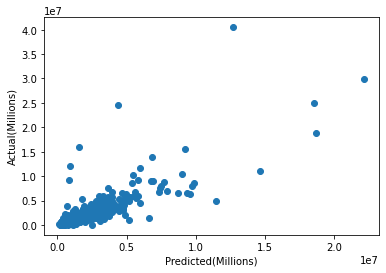

In [347]:
result_plot =  plt.figure(6)
plt.scatter(y_pred, y_test)

plt.xlabel('Predicted(Millions)')
plt.ylabel('Actual(Millions)')

In [326]:
min(X)

'Aguanga'

Overfitting because test prediction is 3x the value of train prediction

## Trying to Get Better Score

## Breakdown Important Features

In [311]:
importance = random_forest.feature_importances_[:8]

In [312]:
importance

array([0.02183734, 0.01560486, 0.37523324, 0.02263855, 0.01991862,
       0.01746739, 0.18489034, 0.26207198])

In [313]:
indexes = ["Bedrooms","Bathrooms","Total interior livable area", 
           "Elementary School Score", "Middle School Score", "High School Score",
          "Tax assessed value", "Annual tax amount"]

In [314]:
importance_df = pd.DataFrame(importance, index=indexes, columns=["Importance"])
importance_df.sort_values(by=['Importance'],ascending=False)

,Importance
Total interior livable area,0.375233
Annual tax amount,0.262072
Tax assessed value,0.184890
Elementary School Score,0.022639
Bedrooms,0.021837
Middle School Score,0.019919
High School Score,0.017467
Bathrooms,0.015605


<AxesSubplot:>

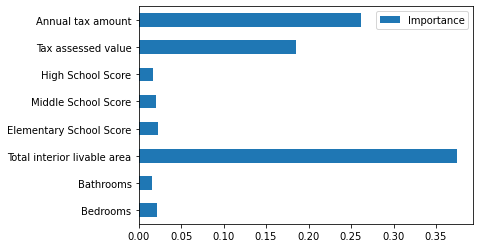

In [315]:
importance_df.plot(kind='barh')

In [316]:
to_keep = importance_df[importance_df["Importance"] > .02].index
to_keep

Index(['Bedrooms', 'Total interior livable area', 'Elementary School Score',
       'Tax assessed value', 'Annual tax amount'],
      dtype='object')

In [317]:
X_to_keep = X[to_keep].copy()
X_to_keep

,Bedrooms,Total interior livable area,Elementary School Score,Tax assessed value,Annual tax amount
0,3,872.0,3.0,505000.0,6253.0
1,5,2612.0,9.0,1775000.0,20787.0
2,4,1579.0,7.0,71347.0,904.0
3,6,3351.0,8.0,2080800.0,25099.0
4,3,2100.0,6.0,1836000.0,21521.0
...,...,...,...,...,...
12486,4,2219.0,7.0,900775.0,12719.0
12487,4,4680.0,7.0,2360150.0,25283.0
12488,3,1860.0,7.0,578000.0,7211.0
12489,3,2125.0,7.0,484696.0,7627.0


In [318]:
X_train, X_test, y_train, y_test = train_test_split(X_to_keep, y, test_size=.2, random_state=21)

In [319]:
random_forest_2 = RandomForestRegressor(n_estimators=200, random_state=0)
random_forest_2.fit(X_train, y_train)
y_pred = random_forest_2.predict(X_test)

print(r2_score(y_test, y_pred)) # calculating r-score
scores = [rmse(random_forest_2.predict(X_train), y_train), rmse(random_forest_2.predict(X_test), y_test)]
print("Scores ", scores)

0.6319136890988267
Scores  [312895.34855518, 1058743.8935014347]


## Random Forest Regressor 2 was Worse

  ## Randomized Grid Search

In [320]:
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)



random_forest_3 = RandomForestRegressor()
rf_model_random = RandomizedSearchCV(estimator= random_forest_3, param_distributions =
                              random_grid, n_iter=100, cv=3, verbose=2, random_state=42,
                             n_jobs=-1)
rf_model_random.fit(X_train, y_train)
rf_model_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 890,
 'min_samples_leaf': 2,
 'max_features': 0.5,
 'bootstrap': True}

In [321]:
final_rf = RandomForestRegressor(n_estimators=890, min_samples_leaf=2,
                                max_features=0.5, bootstrap=True)

final_rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=2, n_estimators=890)

In [324]:
y_pred = final_rf.predict(X_test)
print(y_pred)

[2004966.03192908  482491.55620952 1823825.33465288 ... 1623120.28583066
 1048896.93443597 1815475.01406384]


In [325]:
print(r2_score(y_test, y_pred)) # calculating r-score
print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.6759215049978677
Testing MSE error is: 986920985916.4146


## That was a shocker

## Using latitude and longitude

In [348]:
df

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo
...,...,...,...,...,...,...,...,...,...,...,...
12486,47425,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,San Jose
12487,47427,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,Villa Park
12488,47436,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,Los Angeles
12489,47437,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,Elk Grove


## **Idea**
Replace city name with coordinates

### Export City names into a file

In [354]:
x = set(df["City"].values)

In [363]:
x

{'Acampo',
 'Aguanga',
 'Alameda',
 'Alamo',
 'Albany',
 'Alpine',
 'Alturas',
 'American Canyon',
 'Anaheim',
 'Angels Camp',
 'Angelus Oaks',
 'Aptos',
 'Arcata',
 'Armona',
 'Artesia',
 'Arvin',
 'Atascadero',
 'Atherton',
 'Auburn',
 'Avenal',
 'Avery',
 'Avila Beach',
 'Badger',
 'Bakersfield',
 'Bell Gardens',
 'Belvedere Tiburon',
 'Ben Lomond',
 'Berkeley',
 'Bethel Island',
 'Beverly Hills',
 'Big Sur',
 'Biola',
 'Bishop',
 'Bloomington',
 'Bodfish',
 'Bonita',
 'Bonsall',
 'Borrego Springs',
 'Boulder Creek',
 'Boulevard',
 'Brea',
 'Brisbane',
 'Brookdale',
 'Buena Park',
 'Burbank',
 'Byron',
 'Calexico',
 'California City',
 'Calipatria',
 'Camino',
 'Campbell',
 'Canby',
 'Canoga Park',
 'Capistrano Beach',
 'Capitola',
 'Cardiff By The Sea',
 'Carmel Valley',
 'Carmichael',
 'Carpinteria',
 'Carson',
 'Castro Valley',
 'Castroville',
 'Cerritos',
 'Chualar',
 'Chula Vista',
 'Citrus Heights',
 'Clarksburg',
 'Clayton',
 'Clearlake',
 'Clearlake Oaks',
 'Coachella',
 'Co

In [360]:
with open('cities.txt', 'w') as fp:
    for city in set(df["City"]):
        fp.write(city)
        fp.write('\n')

## Use File to get Coord
In cities.py, we used an GeoLocation API to grab coordinates for each city

In [438]:
cities_df = pd.read_csv('cities_coord.csv')
cities_df

,City,Latitude,Longitude
0,Acampo,38.174640,-121.278559
1,Aguanga,33.442809,-116.865024
2,Alameda,37.609029,-121.899142
3,Alamo,37.850203,-122.032184
4,Albany,37.886870,-122.297747
...,...,...,...
397,Yolo,38.718454,-121.905900
398,Yorba Linda,33.890110,-117.824971
399,Yountville,38.402201,-122.359506
400,Yuba City,39.140448,-121.616911


### Testing: replace city column with coords

In [439]:
test = df.iloc[:10].copy()
test

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo
5,23,3,2.0,1350.0,9.0,9.0,6.0,442672.0,6434.0,1499000.0,San Carlos
6,26,5,3.0,1910.0,8.0,5.0,6.0,974854.0,13610.0,1098000.0,San Jose
7,29,2,2.0,1127.0,7.0,6.0,7.0,923100.0,11150.0,925000.0,Capitola
8,31,4,2.0,1723.0,4.0,5.0,7.0,1000000.0,12957.0,1115000.0,San Jose
9,33,4,2.0,2783.0,6.0,2.0,6.0,351909.0,4443.0,1995000.0,Los Angeles


In [440]:
cities_df = cities_df.set_index('City')

In [441]:
cities_df

,Latitude,Longitude
City,,
Acampo,38.174640,-121.278559
Aguanga,33.442809,-116.865024
Alameda,37.609029,-121.899142
Alamo,37.850203,-122.032184
Albany,37.886870,-122.297747
...,...,...
Yolo,38.718454,-121.905900
Yorba Linda,33.890110,-117.824971
Yountville,38.402201,-122.359506


In [442]:
test[['Lat', 'Long']] = cities_df.loc[test["City"]].values

In [443]:
cities_df.loc["Los Angeles"].values

array([  34.0536909, -118.242766 ])

In [444]:
test

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City,Lat,Long
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles,34.053691,-118.242766
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City,34.021122,-118.396466
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara,37.233325,-121.684635
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco,37.779026,-122.419906
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo,37.496904,-122.333057
5,23,3,2.0,1350.0,9.0,9.0,6.0,442672.0,6434.0,1499000.0,San Carlos,37.504936,-122.261823
6,26,5,3.0,1910.0,8.0,5.0,6.0,974854.0,13610.0,1098000.0,San Jose,37.336166,-121.890591
7,29,2,2.0,1127.0,7.0,6.0,7.0,923100.0,11150.0,925000.0,Capitola,36.976293,-121.954057
8,31,4,2.0,1723.0,4.0,5.0,7.0,1000000.0,12957.0,1115000.0,San Jose,37.336166,-121.890591
9,33,4,2.0,2783.0,6.0,2.0,6.0,351909.0,4443.0,1995000.0,Los Angeles,34.053691,-118.242766


### For Reals

In [467]:
df[['Lat', 'Long']] = cities_df.loc[df["City"]].values
df

,Unnamed: 0,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,City,Lat,Long
0,1,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,Los Angeles,34.053691,-118.242766
1,3,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,Culver City,34.021122,-118.396466
2,10,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,Santa Clara,37.233325,-121.684635
3,12,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,San Francisco,37.779026,-122.419906
4,18,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,San Mateo,37.496904,-122.333057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,47425,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,San Jose,37.336166,-121.890591
12487,47427,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,Villa Park,33.814754,-117.820623
12488,47436,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,Los Angeles,34.053691,-118.242766
12489,47437,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,Elk Grove,38.408799,-121.371618


In [468]:
df = df.drop(columns=["Unnamed: 0", "City"])
df

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Listed Price,Lat,Long
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,525000.0,34.053691,-118.242766
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,1895000.0,34.021122,-118.396466
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,1428000.0,37.233325,-121.684635
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,2250000.0,37.779026,-122.419906
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,2390000.0,37.496904,-122.333057
...,...,...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,1224888.0,37.336166,-121.890591
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,2569000.0,33.814754,-117.820623
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,2295000.0,34.053691,-118.242766
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,499888.0,38.408799,-121.371618


In [469]:
df = df[[col for col in df.columns if col != "Listed Price"] + ["Listed Price"]]

In [480]:
df

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Lat,Long,Listed Price
0,3,2.0,872.0,3.0,2.0,2.0,505000.0,6253.0,34.053691,-118.242766,525000.0
1,5,3.0,2612.0,9.0,7.0,8.0,1775000.0,20787.0,34.021122,-118.396466,1895000.0
2,4,2.0,1579.0,7.0,5.0,6.0,71347.0,904.0,37.233325,-121.684635,1428000.0
3,6,3.0,3351.0,8.0,7.0,7.0,2080800.0,25099.0,37.779026,-122.419906,2250000.0
4,3,2.0,2100.0,6.0,6.0,8.0,1836000.0,21521.0,37.496904,-122.333057,2390000.0
...,...,...,...,...,...,...,...,...,...,...,...
12486,4,3.0,2219.0,7.0,7.0,9.0,900775.0,12719.0,37.336166,-121.890591,1224888.0
12487,4,5.0,4680.0,7.0,5.0,7.0,2360150.0,25283.0,33.814754,-117.820623,2569000.0
12488,3,2.0,1860.0,7.0,3.0,7.0,578000.0,7211.0,34.053691,-118.242766,2295000.0
12489,3,3.0,2125.0,7.0,7.0,8.0,484696.0,7627.0,38.408799,-121.371618,499888.0


<AxesSubplot:>

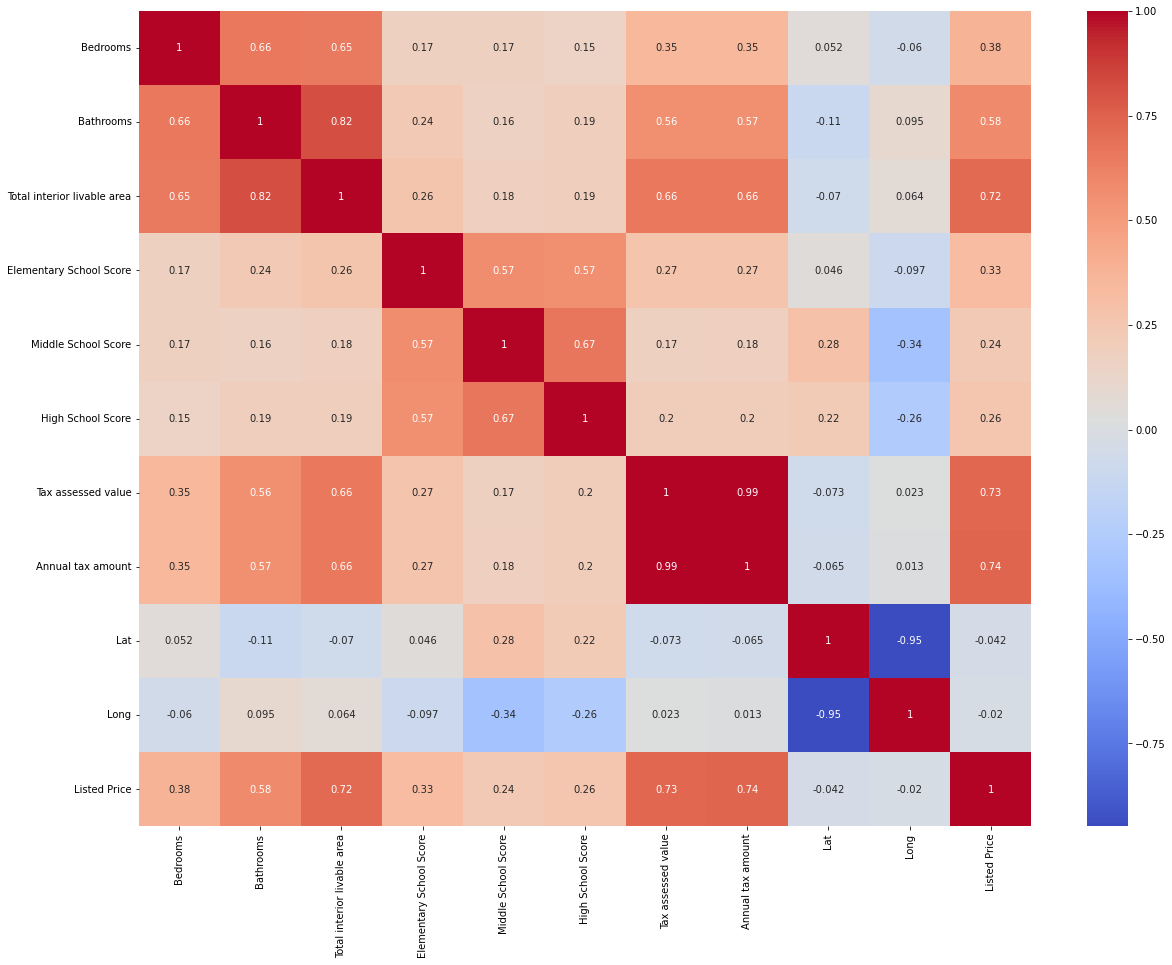

In [471]:
plt.figure(figsize=(20,15))
corr_df = df
corr_matrix = corr_df.corr()
sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True)

In [474]:
corr_df.corr()

,Bedrooms,Bathrooms,Total interior livable area,Elementary School Score,Middle School Score,High School Score,Tax assessed value,Annual tax amount,Lat,Long,Listed Price
Bedrooms,1.000000,0.664999,0.650652,0.172413,0.174654,0.151257,0.347476,0.352713,0.051669,-0.060280,0.380291
Bathrooms,0.664999,1.000000,0.821484,0.238471,0.156335,0.190858,0.563337,0.565125,-0.106936,0.095313,0.581575
Total interior livable area,0.650652,0.821484,1.000000,0.263878,0.183738,0.191260,0.658369,0.661445,-0.069992,0.064478,0.722175
Elementary School Score,0.172413,0.238471,0.263878,1.000000,0.573396,0.565706,0.269621,0.274350,0.046046,-0.096726,0.325513
Middle School Score,0.174654,0.156335,0.183738,0.573396,1.000000,0.670688,0.174684,0.179406,0.284660,-0.337332,0.237118
High School Score,0.151257,0.190858,0.191260,0.565706,0.670688,1.000000,0.197454,0.199316,0.217210,-0.256868,0.260657
Tax assessed value,0.347476,0.563337,0.658369,0.269621,0.174684,0.197454,1.000000,0.992971,-0.072893,0.023370,0.730762
Annual tax amount,0.352713,0.565125,0.661445,0.274350,0.179406,0.199316,0.992971,1.000000,-0.065380,0.013198,0.739566
Lat,0.051669,-0.106936,-0.069992,0.046046,0.284660,0.217210,-0.072893,-0.065380,1.000000,-0.948380,-0.042089
Long,-0.060280,0.095313,0.064478,-0.096726,-0.337332,-0.256868,0.023370,0.013198,-0.948380,1.000000,-0.020320


In [481]:
X = df.drop(columns=["Listed Price"])
y = df["Listed Price"]

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)
print(X_train.shape)
print(X_test.shape)

(9992, 10)
(2499, 10)


In [483]:
random_forest = RandomForestRegressor(n_estimators=200, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [484]:
y_pred = random_forest.predict(X_test)
print(y_pred)

[1834925.87   498621.385 1814260.975 ... 1564843.095 1403779.475
 1894011.17 ]


In [485]:
print(r2_score(y_test, y_pred)) # calculating r-score
print(f'Testing MSE error is: {round(mean_squared_error(y_pred, y_test),4)}') # testing MSE

0.6876268581187222
Testing MSE error is: 951274502670.2574


In [497]:
features = df.iloc[:, :-1]